# Deep Learning Project



## 1. Boston 주택 가격 예측 모델
- 보스턴 시의 주택 가격에 대한 데이터셋
- 주택의 여러 요건들과 가격 정보가 포함
- 회귀분석에 자주 사용되는 대표적인 데이터셋
___
**데이터셋의 feature 설명**

- CRIM : 자치시별 1인당 범죄율
- ZN : 25,000 평방비트를 초과하는 거주지역의 비율
- INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
- CHAS : 찰스 강에 대한 더미변수(강의 경계 위치=1, 아니면=0)
- NOX : 10ppm 당 농축 일산화탄소
- RM : 주택 1 가구당 평균 방의 개수
- AGE : 1940년 이전에 건축된 소유주택의 비율
- DIS : 5개의 보스턴 직업센터까지의 접근성 지수
- RAD : 방사형 도로까지의 접근성 지수
- TAX : 10,000 달러당 재산세율
- PTRATIO : 자치시 별 학생/교사 비율
- B : 1000(Bk - 0.63)^2, (Bk : 자치시별 흑인의 비율)
- LSTAT : 모집단의 하위 계층 비율(%)
- MEDV : 본인 소유의 주택가격(중앙값) (단위 : $1,000)

### (1) 데이터 로드 및 전처리

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
#mean = test_data.mean(axis=0)
test_data = test_data - mean
#std = test_data.std(axis=0)
test_data = test_data / std

- test 데이터는 평균과 표준편차를 test data로 구하는 것이 아니라 train data로 구한 것으로 사용한다.

### (2) 모델 구성 및 컴파일

Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성

In [24]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = keras.Sequential()
model.add(layers.Dense(64, activation='sigmoid', input_shape=(train_data.shape[1],),dtype=tf.float32))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                896       
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [25]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

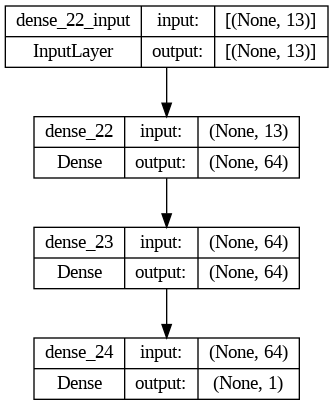

In [26]:
utils.plot_model(model, show_shapes=True)

### (3) 모델 학습

In [32]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
#history = model.fit(train_data, train_labels, epochs=40)
history = model.fit(train_data, train_labels, epochs=40, validation_split=0.2)

Epoch 1/40
11/11 [==============================] - 1s 58ms/step - loss: 528.5834 - mae: 21.0814 - val_loss: 597.3483 - val_mae: 22.6457
Epoch 2/40
11/11 [==============================] - 0s 13ms/step - loss: 528.5834 - mae: 21.0814 - val_loss: 597.3483 - val_mae: 22.6457
Epoch 3/40
11/11 [==============================] - 0s 11ms/step - loss: 528.5834 - mae: 21.0814 - val_loss: 597.3483 - val_mae: 22.6457
Epoch 4/40
11/11 [==============================] - 0s 9ms/step - loss: 528.5834 - mae: 21.0814 - val_loss: 597.3483 - val_mae: 22.6457
Epoch 5/40
11/11 [==============================] - 0s 11ms/step - loss: 528.5834 - mae: 21.0814 - val_loss: 597.3483 - val_mae: 22.6457
Epoch 6/40
11/11 [==============================] - 0s 11ms/step - loss: 528.5834 - mae: 21.0814 - val_loss: 597.3483 - val_mae: 22.6457
Epoch 7/40
11/11 [==============================] - 0s 9ms/step - loss: 528.5834 - mae: 21.0814 - val_loss: 597.3483 - val_mae: 22.6457
Epoch 8/40
11/11 [=========================

<ipython-input-33-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


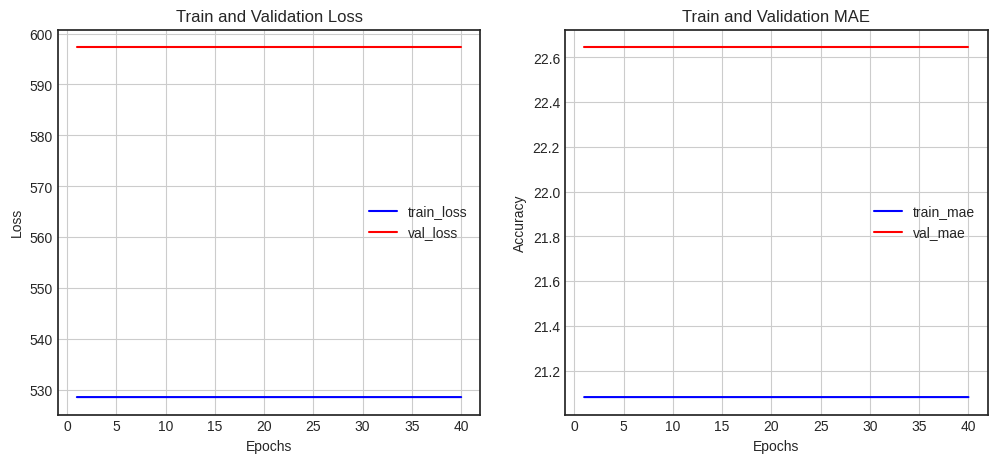

In [33]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### (4) 모델 평가 및 예측

In [34]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 5ms/step - loss: 570.7010 - mae: 22.0784


[570.7009887695312, 22.078432083129883]

In [37]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
result = model.predict(train_data)

plt.scatter(train_data, test_data)
plt.plot(train_data, result, 'r')
plt.show()

In [ ]:
model.layers

In [ ]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

In [ ]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

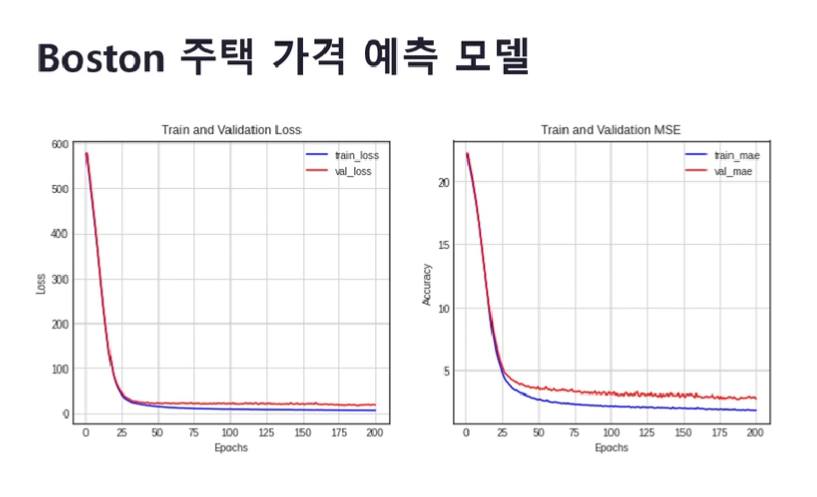

## 2. Reuters 딥러닝 모델


- 로이터 뉴스 기사 데이터셋
- 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분
- 뉴스 기사의 주제로 46개의 레이블
⇒ 다중 분류 문제
___

이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습. 하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있음. 8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용

### (1) 데이터 로드 및 전처리

**전처리**
- 텍스트 데이터를 벡터로 변환
- 일반적으로 자주 사용되는 원핫 인코딩을 이용하여 텍스트를 0과 1의 벡터로 변환
- 뉴스 주제인 레이블도 원핫인코딩을 이용해 변환 수정

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [6]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data_full,
                                                                  train_labels_full,
                                                                  test_size=0.25,
                                                                  random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력
print('훈련 데이터: ',len(train_data))
print('검증 데이터: ',len(val_data))
print('테스트 데이터: ',len(test_data))
print('레이블 종류: ',len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
훈련 데이터:  6736
검증 데이터:  2246
테스트 데이터:  2246
레이블 종류:  46


In [7]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i,d] = 1
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

### (2) 모델 구성 및 컴파일

In [8]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 128)               0

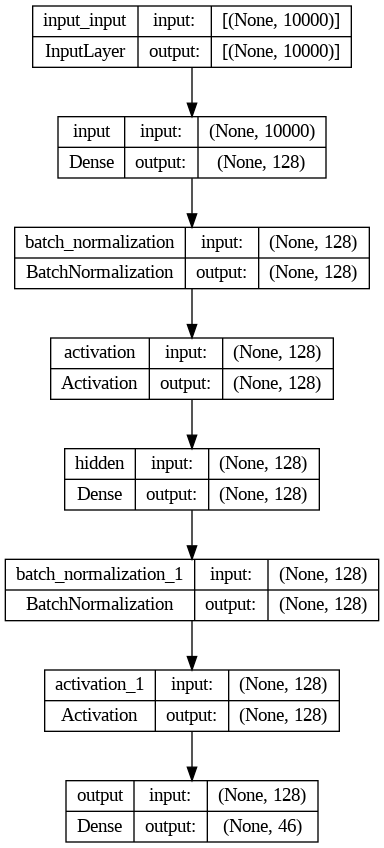

In [9]:
utils.plot_model(model, show_shapes=True)

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))
diff_history(history, batch_norm_history)

### (3) 모델 학습

In [ ]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])


check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### (4) 모델 평가 및 예측

In [ ]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

In [ ]:
## 혼동행렬(coufusion_matrix)를 이용해 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

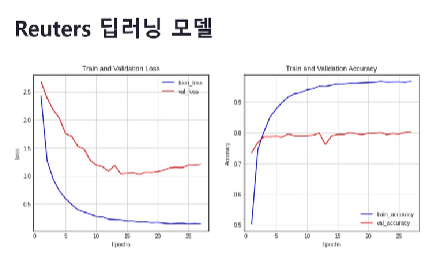

## 3. CIFAR10 딥러닝 모델

- 32x32픽셀의 60,000개 컬러이미지가 포함
- 각 이미지는 10개의 클래스로 라벨링
- MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 데이터셋



### (1) 데이터 로드 및 전처리

- 32x32x3 크기의 이미지를 3072 크기로 변형 (1차원으로 변형)
- 0 ~ 255 사이의 값을 가지는 이미지를 0 ~ 1 사이의 값으로 변환

In [12]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

In [ ]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

In [ ]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

In [ ]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### (2) 모델 구성 및 컴파일

In [ ]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

In [ ]:
model.summary()

In [ ]:
utils.plot_model(model, show_shapes=True)

### (3) 모델 학습

In [ ]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

In [ ]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

### (4) 모델 평가 및 예측

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

- 위에서는 Dense layer만 가지고 모델학습을 했는데, 이미지 데이터는 그에 적합한 기법을 사용해야 한다.\
따라서 위에서는 성능이 낮게 나온 것으로, 이미지 데이터를 잘 처리하려면 CNN 계열의 성능이 좋은 아키텍처를 거쳐야 한다.

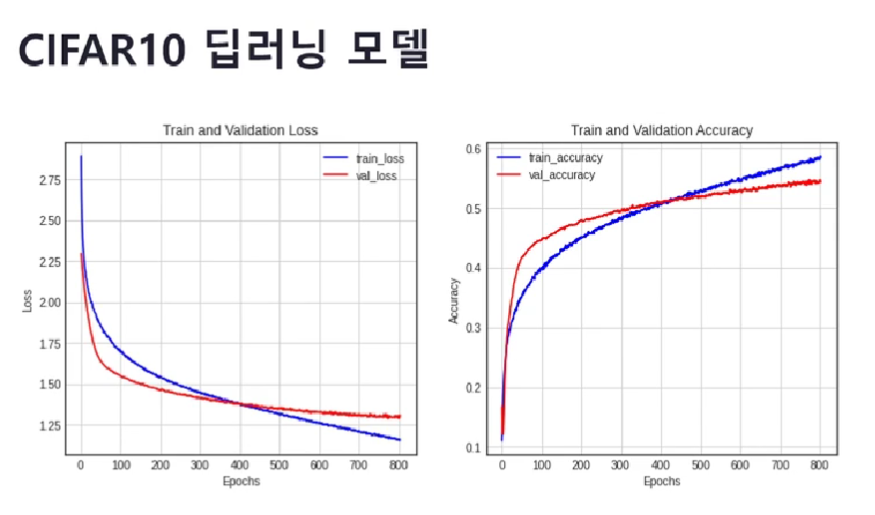

## 4. 회고

## 5. Reference